In [6]:
import math
import random

class player:
    def __init__(self,letter,name):
        #letter is x or o
        self.letter=letter
        self.name=name
    def getmove(self,game):

        pass
class HumanPlayer(player):
    def __init__(self, letter,name):
        super().__init__(letter,name)

    def get_move(self, game):
        valid_square = False
        val = None
        while not valid_square:
            square = input(self.letter + '\'s turn. Input move (0-9): ')
            try:
                val = int(square)
                if val not in game.available_moves():
                    raise ValueError
                valid_square = True
            except ValueError:
                print('Invalid square. Try again.')
        return val


class RandomComputerPlayer(player):
    def __init__(self, letter,name):
        super().__init__(letter,name)

    def get_move(self, game):
        square = random.choice(game.available_moves())
        return square       
class GenuisComputerPlayer(player):
    def __init__(self, letter,name):
       super().__init__(letter,name)
    def get_move(self,game):
        if len(game.available_moves())==9:
            square =random.choice(game.available_moves())
        else:
            #get the square based of minimax algorithm
            square=self.minimax(game,self.letter)['position']
        return square
    def minimax(self,state,player):
        max_player=self.letter 
        other_player='O' if player=='X' else 'X'
        if state.current_winner==other_player:
            #return position and score to keep track of the score
            return {'position':None,
            'score':1*(state.num_empty_squares()+1) if other_player==max_player else -1 *(state.num_empty_squares()+1)}
        elif not state.empty_squares():
            return {'position':None,'score':0}

        if player==max_player:
            #each score should maximize 
            best={'position':None,'score':-math.inf}        
        else:

            best={'position':None,'score':math.inf}        
        for possible_move in state.available_moves():
            #make a move
            state.make_move(possible_move,player)
            #recurse using minimax to simulate a game after making a move
            sim_score=self.minimax(state,other_player)
            #undo the move
            state.board[possible_move]=' '
            state.current_winner=None
            sim_score['position']=possible_move
            # update the dictionaries if necessary
            if player==max_player:  

            # i am trying to maximize the max_player             
                if sim_score['score']>best['score']:
                    best=sim_score
            else :
                #minimize the other player
                if sim_score['score']<best['score']:
                    best=sim_score        
        return best            
            
        

In [32]:


import math
import time
from player import HumanPlayer, RandomComputerPlayer





class TicTacToe():
    def __init__(self):
        self.board = self.make_board()
        self.current_winner = None

    @staticmethod
    def make_board():
        return [' ' for _ in range(9)]

    def print_board(self):
        for row in [self.board[i*3:(i+1) * 3] for i in range(3)]:
            print('| ' + ' | '.join(row) + ' |')

    @staticmethod
    def print_board_nums():
        # 0 | 1 | 2
        number_board = [[str(i) for i in range(j*3, (j+1)*3)] for j in range(3)]
        for row in number_board:
            print('| ' + ' | '.join(row) + ' |')

    def make_move(self, square, letter):
        if self.board[square] == ' ':
            self.board[square] = letter
            if self.winner(square, letter):
                self.current_winner = letter
            return True
        return False

    def winner(self, square, letter):
        # check the row
        row_ind = math.floor(square / 3)
        row = self.board[row_ind*3:(row_ind+1)*3]
        # print('row', row)
        if all([s == letter for s in row]):
            return True
        col_ind = square % 3
        column = [self.board[col_ind+i*3] for i in range(3)]
        # print('col', column)
        if all([s == letter for s in column]):
            return True
        if square % 2 == 0:
            diagonal1 = [self.board[i] for i in [0, 4, 8]]
            # print('diag1', diagonal1)
            if all([s == letter for s in diagonal1]):
                return True
            diagonal2 = [self.board[i] for i in [2, 4, 6]]
            # print('diag2', diagonal2)
            if all([s == letter for s in diagonal2]):
                return True
        return False

    def empty_squares(self):
        return ' ' in self.board

    def num_empty_squares(self):
        return self.board.count(' ')

    def available_moves(self):
        return [i for i, x in enumerate(self.board) if x == " "]


def play(game, x_player, o_player, print_game=True):

    if print_game:
        game.print_board_nums()

    letter = 'X'
    while game.empty_squares():
        if letter == 'O':
            square = o_player.get_move(game)
        else:
            square = x_player.get_move(game)
        if game.make_move(square, letter):

            if print_game:
                print(letter + ' makes a move to square {}'.format(square))
                game.print_board()
                print('')

            if game.current_winner:
                if print_game:
                    if letter=='X':
                        
                        print(x_player.name + ' wins!')
                    else:
                        print(o_player.name + ' wins!')
                        
                return letter  # ends the loop and exits the game
            letter = 'O' if letter == 'X' else 'X'  # switches player
        if print_game:
            time.sleep(.8)

    if print_game:
        print('It\'s a tie!')










In [36]:
x_player=RandomComputerPlayer('X',"random computer")
o_player=RandomComputerPlayer('O',"Genuis computer")
t=TicTacToe()
def sim(game,x_player,o_player,k):
    X_count=0
    O_count=0
    Tie_count=0
    for i in range(k):
        res=play(game,x_player,o_player,print_game=False) 
        if res=='X':
            X_count+=1
        elif res=='O':
            O_count+=1
        else:
            Tie_count+=1

    #X_count=X_count/k*100                
    #O_count=O_count/k*100                
    #Tie_count=Tie_count/k*100
    

            
    
    return {'x_count':X_count,'O_count':O_count,'Tie':Tie_count}
sim(t,x_player,o_player,3000)    


{'x_count': 1, 'O_count': 0, 'Tie': 2999}

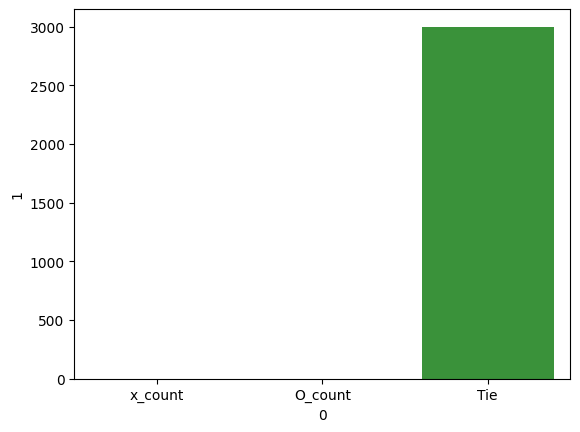

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

res=sim(t,x_player,o_player,3000)    
df= pd.DataFrame(res.items())
sns.barplot(x=0,y=1,data=df)
plt.show()